## Aula 05

- Criar um arquivo no espaço
- Abrir shp
- Conversão CRS
- Medição de área


In [54]:
# Importação do pacote

import geopandas as gpd
import pandas as pd

# Ler um arquivo

emission_df = pd.read_csv(r"D:\Documentos\Doutorado\Python\python_env_app\dados\aula05\emission_total_light.csv")

# Head
emission_df.head()

,CPF_CNPJ,NOME_PESSOA,Latitude,Longitude,ANO,CD_MUN,NM_MUN,SIGLA_UF,TIER,SETOR,...,PCDDF,PM10,PM25,Se,SOx,TSP,Ni,NMVOC,HCB,PCB
0,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2017,2905701,Camaçari,BA,1,Refino de petróleo,...,7.505054e-11,0.550371,0.368998,0.000238,23.453294,0.706726,0.023741,NaN,NaN,NaN
1,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2018,2905701,Camaçari,BA,1,Refino de petróleo,...,8.231914e-11,0.603674,0.404736,0.000261,25.724732,0.775172,0.026040,NaN,NaN,NaN
2,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2019,2905701,Camaçari,BA,1,Refino de petróleo,...,1.063463e-10,0.779873,0.522869,0.000337,33.233207,1.001427,0.033641,NaN,NaN,NaN
3,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2020,2905701,Camaçari,BA,1,Refino de petróleo,...,1.326467e-10,0.972742,0.652179,0.000420,41.452086,1.249090,0.041961,NaN,NaN,NaN
4,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2021,2905701,Camaçari,BA,1,Refino de petróleo,...,1.302132e-10,0.954897,0.640215,0.000412,40.691625,1.226174,0.041191,NaN,NaN,NaN


In [55]:
# Transformando para geodataframe

emission_gdf = gpd.GeoDataFrame(
    emission_df,
    geometry=gpd.points_from_xy(emission_df.Longitude, emission_df.Latitude),
    crs= "EPSG:4326"
)

# Head
emission_gdf.head()

,CPF_CNPJ,NOME_PESSOA,Latitude,Longitude,ANO,CD_MUN,NM_MUN,SIGLA_UF,TIER,SETOR,...,PM10,PM25,Se,SOx,TSP,Ni,NMVOC,HCB,PCB,geometry
0,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2017,2905701,Camaçari,BA,1,Refino de petróleo,...,0.550371,0.368998,0.000238,23.453294,0.706726,0.023741,NaN,NaN,NaN,POINT (-38.30667 -12.65917)
1,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2018,2905701,Camaçari,BA,1,Refino de petróleo,...,0.603674,0.404736,0.000261,25.724732,0.775172,0.026040,NaN,NaN,NaN,POINT (-38.30667 -12.65917)
2,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2019,2905701,Camaçari,BA,1,Refino de petróleo,...,0.779873,0.522869,0.000337,33.233207,1.001427,0.033641,NaN,NaN,NaN,POINT (-38.30667 -12.65917)
3,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2020,2905701,Camaçari,BA,1,Refino de petróleo,...,0.972742,0.652179,0.000420,41.452086,1.249090,0.041961,NaN,NaN,NaN,POINT (-38.30667 -12.65917)
4,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2021,2905701,Camaçari,BA,1,Refino de petróleo,...,0.954897,0.640215,0.000412,40.691625,1.226174,0.041191,NaN,NaN,NaN,POINT (-38.30667 -12.65917)


In [56]:
# Explorando no espaço
emission_gdf.explore(
    column="PM10",
    cmap="tab10",
    tooltip=["SETOR", "NM_MUN"], 
)

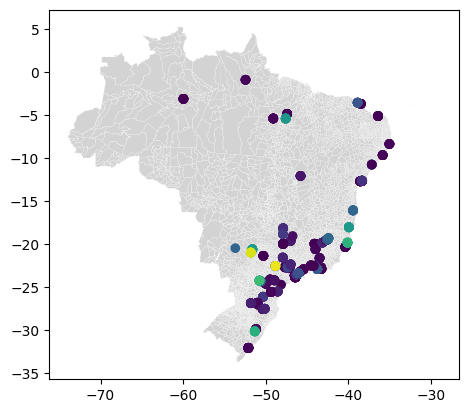

In [57]:
# Explorando com o matplotlib

import matplotlib.pyplot as plt
fig, ax = plt.subplots()


# Adicionando shp com as delimmitações dos municipios brasileiros

municipios_gdf = gpd.read_file(r"D:\Documentos\Doutorado\Python\python_env_app\dados\aula05\BR_Municipios_2024\BR_Municipios_2024.shp")

municipios_gdf.plot(ax=ax, edgecolor='white', linewidth=0.1, color='lightgray')

# Adicionando pontos com emissões

emission_gdf.plot(
    column= "PM10",
    ax=ax
)

# Salvando figura

fig.savefig(r"D:\Documentos\Doutorado\Python\python_env_app\outputs\emissoes_brasil.png", dpi=300)


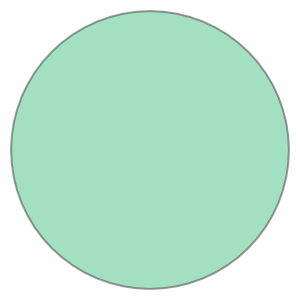

In [58]:
# Converter o CRS
emission_gdf = emission_gdf.to_crs(crs='3857')

# Buffer

buffer_emission = emission_gdf.buffer(2000)

buffer_emission.head()
buffer_emission[0]

In [59]:
# Estimar a área do Buffer

emission_gdf['buffer'] = buffer_emission

emission_gdf['buffer_area'] = buffer_emission.area

emission_gdf.head()

,CPF_CNPJ,NOME_PESSOA,Latitude,Longitude,ANO,CD_MUN,NM_MUN,SIGLA_UF,TIER,SETOR,...,Se,SOx,TSP,Ni,NMVOC,HCB,PCB,geometry,buffer,buffer_area
0,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2017,2905701,Camaçari,BA,1,Refino de petróleo,...,0.000238,23.453294,0.706726,0.023741,NaN,NaN,NaN,POINT (-4264278.664 -1420819.387),"POLYGON ((-4262278.664 -1420819.387, -4262288....",1.254619e+07
1,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2018,2905701,Camaçari,BA,1,Refino de petróleo,...,0.000261,25.724732,0.775172,0.026040,NaN,NaN,NaN,POINT (-4264278.664 -1420819.387),"POLYGON ((-4262278.664 -1420819.387, -4262288....",1.254619e+07
2,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2019,2905701,Camaçari,BA,1,Refino de petróleo,...,0.000337,33.233207,1.001427,0.033641,NaN,NaN,NaN,POINT (-4264278.664 -1420819.387),"POLYGON ((-4262278.664 -1420819.387, -4262288....",1.254619e+07
3,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2020,2905701,Camaçari,BA,1,Refino de petróleo,...,0.000420,41.452086,1.249090,0.041961,NaN,NaN,NaN,POINT (-4264278.664 -1420819.387),"POLYGON ((-4262278.664 -1420819.387, -4262288....",1.254619e+07
4,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2021,2905701,Camaçari,BA,1,Refino de petróleo,...,0.000412,40.691625,1.226174,0.041191,NaN,NaN,NaN,POINT (-4264278.664 -1420819.387),"POLYGON ((-4262278.664 -1420819.387, -4262288....",1.254619e+07


In [60]:
# Extraindo as cidades e estados de cada ponto

clipped_points = gpd.clip(municipios_gdf.to_crs(crs='3857'), emission_gdf)
clipped_points.head()

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry
1780,4315602,Rio Grande,430009,Pelotas,4302,Pelotas,43,Rio Grande do Sul,RS,4,Sul,S,4315602,Rio Grande,2682.867,"MULTIPOINT ((-5799982.803 -3772862.543), (-579..."
4432,4309308,Guaíba,430001,Porto Alegre,4301,Porto Alegre,43,Rio Grande do Sul,RS,4,Sul,S,4314902,Porto Alegre/RS,377.664,POINT (-5712453.512 -3520547.185)
731,4304606,Canoas,430001,Porto Alegre,4301,Porto Alegre,43,Rio Grande do Sul,RS,4,Sul,S,4314902,Porto Alegre/RS,130.774,POINT (-5695875.146 -3487096.57)
1085,4309209,Gravataí,430001,Porto Alegre,4301,Porto Alegre,43,Rio Grande do Sul,RS,4,Sul,S,4314902,Porto Alegre/RS,468.288,POINT (-5668629.701 -3496018.169)
677,4322004,Triunfo,430006,Charqueadas - Triunfo - São Jerônimo,4301,Porto Alegre,43,Rio Grande do Sul,RS,4,Sul,S,None,None,817.807,"MULTIPOINT ((-5722035.226 -3487224.946), (-572..."


<Axes: >

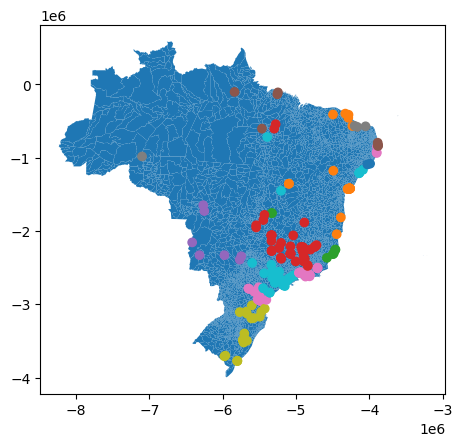

In [61]:
# Plotando por estado
fig, ax = plt.subplots()
municipios_gdf.to_crs(crs='3857').plot(ax=ax)
clipped_points.plot(column='SIGLA_UF', ax = ax)

In [62]:
# Encontrando municipios de cada ponto

clipped_points = gpd.sjoin(emission_gdf, municipios_gdf.to_crs(crs='3857'), how='inner')
clipped_points.head()

,CPF_CNPJ,NOME_PESSOA,Latitude,Longitude,ANO,CD_MUN_left,NM_MUN_left,SIGLA_UF_left,TIER,SETOR,...,NM_RGINT,CD_UF,NM_UF,SIGLA_UF_right,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2
0,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2017,2905701,Camaçari,BA,1,Refino de petróleo,...,Salvador,29,Bahia,BA,2,Nordeste,NE,2927408,Salvador/BA,785.421
1,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2018,2905701,Camaçari,BA,1,Refino de petróleo,...,Salvador,29,Bahia,BA,2,Nordeste,NE,2927408,Salvador/BA,785.421
2,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2019,2905701,Camaçari,BA,1,Refino de petróleo,...,Salvador,29,Bahia,BA,2,Nordeste,NE,2927408,Salvador/BA,785.421
3,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2020,2905701,Camaçari,BA,1,Refino de petróleo,...,Salvador,29,Bahia,BA,2,Nordeste,NE,2927408,Salvador/BA,785.421
4,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2021,2905701,Camaçari,BA,1,Refino de petróleo,...,Salvador,29,Bahia,BA,2,Nordeste,NE,2927408,Salvador/BA,785.421


In [63]:
# Agrupando emissões por estado

grupped_by_uf = clipped_points[['SIGLA_UF_right', 'PM10']].groupby('SIGLA_UF_right').sum()
grupped_by_uf

,PM10
SIGLA_UF_right,
AL,252.149625
AM,97.857233
AP,0.000000
BA,25589.210874
CE,5337.854316
DF,0.000000
ES,20143.627347
GO,2710.165675
MA,10297.261584


<BarContainer object of 24 artists>

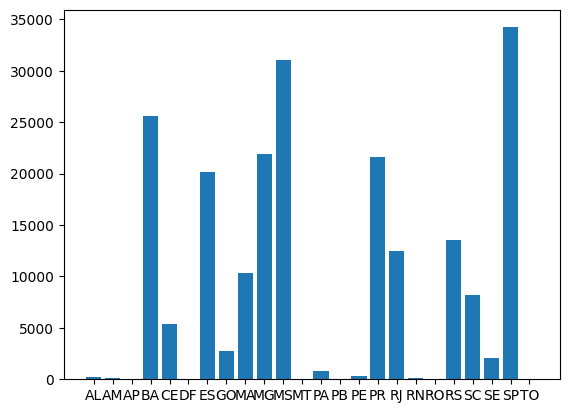

In [64]:
fig, ax = plt.subplots()
ax.bar(grupped_by_uf.index, grupped_by_uf.PM10)

In [70]:
# Calculando a área industrializada

# Criando uma cópia

emission_gdf_buffer = emission_gdf.copy()

# primeiro, removeremos as sobreposições

emission_gdf['geometry'] = emission_gdf['buffer']



#união

emission_gdf_buffer = emission_gdf_buffer.union_all()

# Estimando a área industrializada

emission_gdf_buffer.area

#Estimando a área do Brasil
municipios_gdf.to_crs(crs='3857').area.sum()

# Porcentagem industrializada
100*emission_gdf_buffer.area/municipios_gdf.to_crs(crs='3857').area.sum()





np.float64(0.02507932005167436)

## Rasterio

In [75]:
import rasterio

path = r"D:\Documentos\Doutorado\Python\python_env_app\dados\aula05\mapbiomas_10m_collection2_integration_v1-classification_2023.tif"
dataset = rasterio.open(path)

# Extraindo o comprimento do raster
print(dataset.width)
print(dataset.height)

# Extraindo os contornos
dataset.bounds

465718
476412


BoundingBox(left=-74.89739613957876, bottom=-34.852027909513524, right=-33.06123639062119, top=7.9447902042814595)

In [77]:
print (dataset.crs)

# Primeiro temos que converter o CRS

emission_gdf = emission_gdf.to_crs(crs='4326') #ou dataset.crs

print(emission_gdf.crs)

EPSG:4326
EPSG:4326


In [78]:
# Transformando para geodataframe

emission_gdf = gpd.GeoDataFrame(
    emission_df,
    geometry=gpd.points_from_xy(emission_df.Longitude, emission_df.Latitude),
    crs= "epsg: 4326"
)    


# Extraindo o uso do solo para cada ponto de emissão

coord_list = [(x,y) for x, y in zip(emission_gdf.geometry.x, emission_gdf.geometry.y)]

# Amostrando os pontos do raster no MapBiomas

emission_gdf['mapbiomas'] = [x[0] for x in dataset.sample(coord_list)]


emission_gdf.head()

,CPF_CNPJ,NOME_PESSOA,Latitude,Longitude,ANO,CD_MUN,NM_MUN,SIGLA_UF,TIER,SETOR,...,PM25,Se,SOx,TSP,Ni,NMVOC,HCB,PCB,geometry,mapbiomas
0,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2017,2905701,Camaçari,BA,1,Refino de petróleo,...,0.368998,0.000238,23.453294,0.706726,0.023741,NaN,NaN,NaN,POINT (-38.30667 -12.65917),24
1,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2018,2905701,Camaçari,BA,1,Refino de petróleo,...,0.404736,0.000261,25.724732,0.775172,0.026040,NaN,NaN,NaN,POINT (-38.30667 -12.65917),24
2,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2019,2905701,Camaçari,BA,1,Refino de petróleo,...,0.522869,0.000337,33.233207,1.001427,0.033641,NaN,NaN,NaN,POINT (-38.30667 -12.65917),24
3,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2020,2905701,Camaçari,BA,1,Refino de petróleo,...,0.652179,0.000420,41.452086,1.249090,0.041961,NaN,NaN,NaN,POINT (-38.30667 -12.65917),24
4,04.585.532/0001-99,DAX OIL REFINO S/A,-12.659167,-38.306667,2021,2905701,Camaçari,BA,1,Refino de petróleo,...,0.640215,0.000412,40.691625,1.226174,0.041191,NaN,NaN,NaN,POINT (-38.30667 -12.65917),24


In [79]:
# Agrupando por uso do solo

emission_gdf.groupby('mapbiomas').count()

,CPF_CNPJ,NOME_PESSOA,Latitude,Longitude,ANO,CD_MUN,NM_MUN,SIGLA_UF,TIER,SETOR,...,PM10,PM25,Se,SOx,TSP,Ni,NMVOC,HCB,PCB,geometry
mapbiomas,,,,,,,,,,,,,,,,,,,,,
3,33,33,33,33,33,33,33,33,33,33,...,33,33,8,17,33,8,33,8,8,33
5,8,8,8,8,8,8,8,8,8,8,...,0,0,0,0,0,0,8,0,0,8
9,3,3,3,3,3,3,3,3,3,3,...,3,3,0,3,3,0,3,0,0,3
11,12,12,12,12,12,12,12,12,12,12,...,7,7,7,0,7,7,12,7,7,12
12,8,8,8,8,8,8,8,8,8,8,...,8,8,8,0,8,8,8,8,8,8
15,29,29,29,29,29,29,29,29,29,29,...,16,16,8,29,24,8,8,0,0,29
21,64,64,64,64,64,64,64,64,64,64,...,31,31,8,46,46,8,41,0,0,64
24,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,...,502,502,224,609,856,224,748,112,112,1290
25,88,88,88,88,88,88,88,88,88,88,...,34,34,16,67,82,16,25,8,8,88


In [81]:
# Recortando o uso do solo para uma cidade 

# Selecionando a cidade

fpolis = municipios_gdf[municipios_gdf.NM_MUN == '']
fpolis = fpolis.to_crs(crs='4326').buffer(1).to_crs(crs='4326')


In [83]:
# Recortando

import rasterio.mask

for index, row in municipios_gdf.iterrows():
    if row.NM_MUN == 'Florianópolis':
        #Abrindo arquivo MAPBIOMAS
        with rasterio.open(path) as src:
            try:
                out_image, out_transform = rasterio.mask.mask(src,[row.buffer],
                                                              crop=True)
            except:
                out_image, out_transform = rasterio.mask.mask(src,[row.geometry],
                                                              crop=True)
out_image.shape

(1, 6522, 3180)

np.int64(1114807)

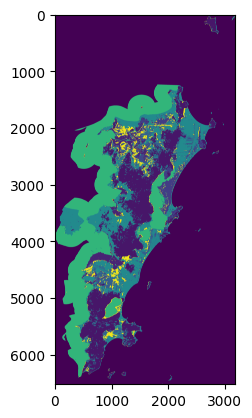

In [84]:
import numpy as np
#Criando figura com o recorte dos dados de uso do solo para Florianópolis

fig,ax = plt.subplots()
ax.imshow(out_image[0,:,:])

# Soma pixels em área urbanizada = 24

np.sum(out_image[0,:,:]==24)